# Privacy Protections in Anonymized Medical Records: 
# A Comprehensive Study of Sensitive Diagnostic Attributes in MIMIC-IV

## Edward Tatchim, Sanjiv M. Narayan, Rohan Krishnamurty
## Datasci 233, Fall 2024, Session 1; v0.2, 11/24/2024

### Project Goals
To study privacy guarantees of patients in MIMIC-IV, who presented to the Emergency room of Harvard Teaching Hospitals from 2008 to 2019. While this data is rigorously de-identified it includes ICD10 diagnostic codes, which may be considered sensitive attributes. The goal of this project is to quantify the risk of attribute or membership disclosure for various selected ICD10 codes using k-anonymity, L-diversity and t-closeness at baseline. We then intend to study how well the risk of disclosure and information gain could be mitigated by a series of generalization and data suppression techniques. We use rigorously de-identified real-world medical data in the form of MIMIC-IV released through MIT and Beth Israel Hospital, and will study ICD10 codes including but not limited to alcohol and substance abuse, in parallel with the DATASCI 233 coursework. This work is in preparation for submission to the Scientific sessions of the Heart Rhythm Society 2025.

### Data Use Permissions
To access data for our project, we turned to the Physionet resource (https://mimic.mit.edu/). All team members proceeded to complete specific training in human data handling, HIPAA and confidentiality. Each team member obtained a CITI certification to work on human data, which was submitted and formally approved by the Physionet organization (Harvard/Beth Israel Hospital; Massachussetts Institute of Technology) **prior to starting this project.** Certifications and approvals for each team member are available upon request. Only de-identified data will be shown during presentations and publications.

### Data Resource
MIMIC-IV is a publicly available de-identified database sourced from the electronic health records of the Harvard University/Beth Israel Deaconess Medical Center. For this study, we used a subset which contains ICD10 codes and subject demographics. 
https://physionet.org/content/mimic-iv-ecg-ext-icd-labels/1.0.1/ Data available includes patient measurements, orders, diagnoses, procedures, treatments, and deidentified free-text clinical notes.  We use the core table that allows retrieval of different kinds of discharge diagnoses (as ICD-10-CM codes) for a given sample in MIMIV-IV-ECG. The initial scope of this project does not include processing of detailed clinical data (https://physionet.org/content/mimiciv/2.2/) or ECG waveforms (https://physionet.org/content/mimic-iv-ecg/1.0/), which would require more time than available for this project. 

### De-identification process
"Patient identifiers as stipulated by HIPAA were removed. Patient identifiers were replaced using a random cipher, resulting in deidentified integer identifiers for patients, hospitalizations, and ICU stays. Structured data were filtered using look up tables and allow lists. If necessary, a free-text deidentification algorithm was applied to remove PHI from free-text. Finally, date and times were shifted randomly into the future using an offset measured in days. A single date shift was assigned to each subject_id. As a result, the data for a single patient are internally consistent. For example, if the time between two measures in the database was 4 hours in the raw data, then the calculated time difference in MIMIC-IV will also be 4 hours. Conversely, distinct patients are not temporally comparable. That is, two patients admitted in 2130 were not necessarily admitted in the same year."

### References
1. Strodthoff, N., Lopez Alcaraz, J. M., & Haverkamp, W. (2024). MIMIC-IV-ECG-Ext-ICD: Diagnostic labels for MIMIC-IV-ECG (version 1.0.1). PhysioNet. https://doi.org/10.13026/ypt5-9d58.
2. Strodthoff, N. Alcaraz, J.M.L., & Haverkamp, W. (2024). Prospects for Artificial Intelligence-Enhanced ECG as a Unified Screening Tool for Cardiac and Non-Cardiac Conditions – An Explorative Study in Emergency Care, European Heart Journal - Digital Health, ztae039.
3. Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

## Data Dictionary - see Appendix

This is an extensive data repository as summarized in this link: https://physionet.org/content/mimiciv/2.2/  

## Code - Imports, Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown

#code from Lab 2, DATASCI 233
def safe_print_err(e, locals=locals(), globals=globals()):
    locals = locals or {}
    globals = globals or {}
    __problem = eval('__problem', locals, globals)
    err_msg = str(e)
    if type(e) in (NameError, KeyError):
        var_name_split = str(e).split("'")
        if len(var_name_split) > 1:
            var_name = var_name_split[1]
            err_msg = f"'{var_name}' is not defined."

    display(Markdown(f"<div class='alert alert-block alert-danger'><b>Error in problem {__problem}</b>: {err_msg}</div>"))

def print_mk(msg):
    display(Markdown(msg))

In [2]:
df = pd.read_csv("records_w_diag_icd10.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800035 entries, 0 to 800034
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   file_name                800035 non-null  object 
 1   study_id                 800035 non-null  int64  
 2   subject_id               800035 non-null  int64  
 3   ecg_time                 800035 non-null  object 
 4   ed_stay_id               184720 non-null  float64
 5   ed_hadm_id               125314 non-null  float64
 6   hosp_hadm_id             298258 non-null  float64
 7   ed_diag_ed               800035 non-null  object 
 8   ed_diag_hosp             800035 non-null  object 
 9   hosp_diag_hosp           800035 non-null  object 
 10  all_diag_hosp            800035 non-null  object 
 11  all_diag_all             800035 non-null  object 
 12  gender                   800035 non-null  object 
 13  age                      795546 non-null  float64
 14  anch

In [3]:
df.head()

,file_name,study_id,subject_id,ecg_time,ed_stay_id,ed_hadm_id,hosp_hadm_id,ed_diag_ed,ed_diag_hosp,hosp_diag_hosp,...,age,anchor_year,anchor_age,dod,ecg_no_within_stay,ecg_taken_in_ed,ecg_taken_in_hosp,ecg_taken_in_ed_or_hosp,fold,strat_fold
0,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,40689238,10000032,2180-07-23 08:44:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,52.0,2180.0,52.0,2180-09-09,0,True,False,True,17,9
1,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,44458630,10000032,2180-07-23 09:54:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,52.0,2180.0,52.0,2180-09-09,1,True,False,True,17,9
2,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,49036311,10000032,2180-08-06 09:07:00,NaN,NaN,25742920.0,[],[],"['J449', 'B182', 'E871', 'R197', 'V462', 'R188...",...,52.0,2180.0,52.0,2180-09-09,0,False,True,True,17,9
3,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,45090959,10000117,2181-03-04 17:14:00,NaN,NaN,NaN,[],[],[],...,55.0,2174.0,48.0,NaN,-1,False,False,False,18,0
4,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,48446569,10000117,2183-09-18 13:52:00,33176849.0,27988844.0,NaN,"['S72092A', 'W1830XA']","['K219', 'F419', 'Z7901', 'Z87891', 'G43909', ...",[],...,57.0,2174.0,48.0,NaN,0,True,False,True,18,0


In [4]:
df['all_diag_hosp'].head()

0    ['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...
1    ['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...
2    ['K7469', 'E871', 'E875', 'R197', 'J449', 'R18...
3                                                   []
4    ['E7800', 'K219', 'Z87442', 'S72012A', 'I341',...
Name: all_diag_hosp, dtype: object

In [63]:
# Function k_anon can test different k-anonymity guarantees

def k_anon (dataset, qID):
    #qIDs: quasi-identifiers
    subset_df = dataset[qID]

    # Drop duplicate rows based on the quasi-identifiers
    #eqv_classes = subset_df.drop_duplicates().reset_index(drop=True)

    # Group the original data by quasi-identifiers and count the number of rows in each group
    eqv_classes = dataset.groupby(qID).size().reset_index(name='k')

    # Calculate the best k-anonymity guarantee, which is the minimum value of 'k' across all equivalence classes
    k_min = eqv_classes['k'].min()

    try:
        print_mk(f"There are ${len(eqv_classes)}$ equivalence classes:")
        display(eqv_classes)
        print_mk(f"The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k={k_min}.$")
    except Exception as e:
        safe_print_err(e)
        
    return k_min, eqv_classes

## Exploring Equivalence Classes and k-Anonymity

### 'file_name' is unique between records (k=1), and 'ecg_no_within_stay' has outliers that also produce k=1

In [6]:
qID = ['file_name', 'all_diag_all', 'gender', 'age', 'ecg_no_within_stay']
k_anon(df, qID)

There are $795546$ equivalence classes:

,file_name,all_diag_all,gender,age,ecg_no_within_stay,k
0,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...",F,52.0,0,1
1,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...",F,52.0,1,1
2,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['K7469', 'E871', 'E875', 'R197', 'J449', 'R18...",F,52.0,0,1
3,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,[],F,55.0,-1,1
4,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['E7800', 'K219', 'Z87442', 'S72012A', 'I341',...",F,57.0,0,1
...,...,...,...,...,...,...
795541,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['J9690', 'E785', 'I69952', 'J690', 'G40301', ...",M,58.0,0,1
795542,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['J9690', 'E785', 'I69952', 'J690', 'G40301', ...",M,58.0,1,1
795543,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['H53469', 'R569', 'N390', 'E039', 'I619', 'I2...",F,57.0,0,1
795544,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['H53469', 'R569', 'N390', 'E039', 'I619', 'I2...",F,57.0,0,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

### High k-anonymity from 'ecg_taken_in_hosp', 'ecg_taken_in_ed', 'gender'

In [7]:
qID = ['ecg_taken_in_hosp']
k_anon(df, qID)

There are $2$ equivalence classes:

,ecg_taken_in_hosp,k
0,False,501777
1,True,298258


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=298258.$

In [8]:
qID = ['ecg_taken_in_ed']
k_anon(df, qID)

There are $2$ equivalence classes:

,ecg_taken_in_ed,k
0,False,615315
1,True,184720


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=184720.$

In [9]:
qID = ['gender']
k_anon(df, qID)

There are $3$ equivalence classes:

,gender,k
0,F,389335
1,M,406211
2,missing,4489


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=4489.$

### **Note**, age provides a k = 1, but generalizing this greatly increases generalizability 

In [10]:
qID = ['age']
k_anon(df, qID)

There are $89$ equivalence classes:

,age,k
0,12.0,1
1,14.0,4
2,15.0,3
3,16.0,9
4,17.0,28
...,...,...
84,97.0,557
85,98.0,296
86,99.0,137
87,100.0,40


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [11]:
# Generalizing age numbers by binning
df_binnedage = df
df_binnedage['binned_age'] = df['age'].apply(lambda x:
           20 if 0 <= x < 30 else
           30 if 30 <= x < 40 else
           40 if 40 <= x < 50 else
           50 if 50 <= x < 60 else
           60 if 60 <= x < 70 else
           70 if 70 <= x < 80 else
           80 if 80 <= x < 90 else
           90 if x > 90
           else x
)
df_binnedage['binned_age'].value_counts()

60.0    179050
70.0    166207
50.0    136633
80.0    126440
40.0     71207
30.0     42088
90.0     38700
20.0     35221
Name: binned_age, dtype: int64

In [12]:
qID = ['binned_age']
k_anon(df_binnedage, qID)

There are $8$ equivalence classes:

,binned_age,k
0,20.0,35221
1,30.0,42088
2,40.0,71207
3,50.0,136633
4,60.0,179050
5,70.0,166207
6,80.0,126440
7,90.0,38700


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=35221.$

### All diagnoses, gender, 'ecg_no_within_stay' provide k = 1

In [13]:
qID = ['ecg_no_within_stay']
k_anon(df, qID)

There are $107$ equivalence classes:

,ecg_no_within_stay,k
0,-1,331907
1,0,290189
2,1,82018
3,2,35737
4,3,19756
...,...,...
102,101,1
103,102,1
104,103,1
105,104,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [14]:
qID = ['all_diag_all', 'gender', 'ecg_no_within_stay']
k_anon(df, qID)

There are $381098$ equivalence classes:

,all_diag_all,gender,ecg_no_within_stay,k
0,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",F,0,1
1,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",F,1,1
2,"['A021', 'E860', 'F329', 'E785', 'I10', 'K219'...",M,0,1
3,"['A021', 'E860', 'N008', 'D500', 'R32', 'M8440...",F,0,1
4,"['A021', 'E871', 'A048', 'D649', 'K219', 'K510...",M,0,1
...,...,...,...,...
381093,[],M,4,2
381094,[],M,5,2
381095,[],M,6,1
381096,[],M,7,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [15]:
qID = ['gender', 'ecg_no_within_stay']
k_anon(df, qID)

There are $151$ equivalence classes:

,gender,ecg_no_within_stay,k
0,F,-1,162235
1,F,0,147879
2,F,1,38123
3,F,2,15590
4,F,3,8471
...,...,...,...
146,M,102,1
147,M,103,1
148,M,104,1
149,M,105,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

### **Note**: Improve generalizability by removing 'missing' gender (sex), and generalize 'ecg_no_within_stay' to bin outliers

In [16]:
df_fm = df[df["gender"] != "missing"]
df_fm['gender'].value_counts()

M    406211
F    389335
Name: gender, dtype: int64

In [17]:
qID = ['gender', 'ecg_no_within_stay']
k_anon(df_fm, qID)

There are $150$ equivalence classes:

,gender,ecg_no_within_stay,k
0,F,-1,162235
1,F,0,147879
2,F,1,38123
3,F,2,15590
4,F,3,8471
...,...,...,...
145,M,101,1
146,M,102,1
147,M,103,1
148,M,104,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [18]:
qID = ['ecg_no_within_stay']
k_anon(df_fm, qID)

There are $107$ equivalence classes:

,ecg_no_within_stay,k
0,-1,327418
1,0,290189
2,1,82018
3,2,35737
4,3,19756
...,...,...
102,101,1
103,102,1
104,103,1
105,104,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [19]:
df_fm['ecg_no_within_stay'].describe()

count    795546.000000
mean          0.219484
std           2.203892
min          -1.000000
25%          -1.000000
50%           0.000000
75%           0.000000
max         105.000000
Name: ecg_no_within_stay, dtype: float64

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/1803991434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fm['lecg_no_within_stay'] = np.log(df_fm['ecg_no_within_stay']+2)


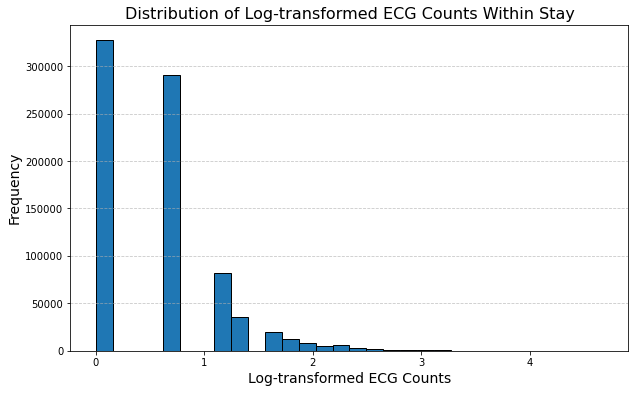

In [20]:
df_fm['lecg_no_within_stay'] = np.log(df_fm['ecg_no_within_stay']+2)

#plot log(distribution) of ECGs taken during the stay
plt.figure(figsize=(10, 6))
plt.hist(df_fm['lecg_no_within_stay'], bins=30, edgecolor='black')
plt.title('Distribution of Log-transformed ECG Counts Within Stay', fontsize=16)
plt.xlabel('Log-transformed ECG Counts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# Because ECG numbers show considerable right skew, we will generalize.
# Generalizing ECG numbers by binning
df_fm_generalecg = df_fm
df_fm_generalecg['binned_ecg'] = df_fm['ecg_no_within_stay'].apply(lambda x:
           0 if x in [-1, 0] else
           x if 1 <= x <= 10 else
           11 if x >10
           else x
)
df_fm_generalecg['binned_ecg'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/1798313405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fm_generalecg['binned_ecg'] = df_fm['ecg_no_within_stay'].apply(lambda x:


0     617607
1      82018
2      35737
3      19756
4      12102
5       7855
11      5521
6       5347
7       3737
8       2608
9       1885
10      1373
Name: binned_ecg, dtype: int64

### Note, Gender, an ECG taken in the ED, number of ECGs provides a k = 1
### Binning ECG to 0-5 raises k to 22

In [22]:
qID = ['gender', 'ecg_taken_in_ed', 'binned_ecg']
k_anon(df_fm_generalecg, qID)

There are $44$ equivalence classes:

,gender,ecg_taken_in_ed,binned_ecg,k
0,F,False,0,224790
1,F,False,1,27340
2,F,False,2,13944
3,F,False,3,8111
4,F,False,4,5036
5,F,False,5,3280
6,F,False,6,2285
7,F,False,7,1600
8,F,False,8,1102
9,F,False,9,814


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

### Binning ECGs (ecg_no_within_stay) of >5 improves Generalization

In [23]:
# Because ECG numbers of ~10 reduce k, consider greater ECG binning
df_fm_generalecg['binned_ecg'] = df_fm['ecg_no_within_stay'].apply(lambda x:
           0 if x in [-1, 0] else
           x if 1 <= x <= 5 else
           6 if x > 5
           else x
            )
df_fm_generalecg['binned_ecg'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3884209715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fm_generalecg['binned_ecg'] = df_fm['ecg_no_within_stay'].apply(lambda x:


0    617607
1     82018
2     35737
6     20471
3     19756
4     12102
5      7855
Name: binned_ecg, dtype: int64

In [24]:
qID = ['gender', 'ecg_taken_in_ed', 'binned_ecg']
k_anon(df_fm_generalecg, qID)

There are $28$ equivalence classes:

,gender,ecg_taken_in_ed,binned_ecg,k
0,F,False,0,224790
1,F,False,1,27340
2,F,False,2,13944
3,F,False,3,8111
4,F,False,4,5036
5,F,False,5,3280
6,F,False,6,8552
7,F,True,0,85324
8,F,True,1,10783
9,F,True,2,1646


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=22.$

### Adding 'gender', 'ecg_taken_in_ed', 'ecg_taken_in_hosp', 'binned_ecg' takes k back to 1 even with ECG binned 0-5
### Subsidiary analyses show that Binned ECG is a major identifier - even binned 0-5

In [25]:
qID = ['gender', 'ecg_taken_in_ed', 'ecg_taken_in_hosp', 'binned_ecg']
k_anon(df_fm_generalecg, qID)

There are $44$ equivalence classes:

,gender,ecg_taken_in_ed,ecg_taken_in_hosp,binned_ecg,k
0,F,False,False,0,162235
1,F,False,True,0,62555
2,F,False,True,1,27340
3,F,False,True,2,13944
4,F,False,True,3,8111
5,F,False,True,4,5036
6,F,False,True,5,3280
7,F,False,True,6,8552
8,F,True,False,0,78443
9,F,True,False,1,10176


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [26]:
qID = ['gender', 'ecg_taken_in_ed', 'ecg_taken_in_hosp']
k_anon(df_fm_generalecg, qID)

There are $8$ equivalence classes:

,gender,ecg_taken_in_ed,ecg_taken_in_hosp,k
0,F,False,False,162235
1,F,False,True,128818
2,F,True,False,90677
3,F,True,True,7605
4,M,False,False,165183
5,M,False,True,154590
6,M,True,False,79193
7,M,True,True,7245


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=7245.$

## k-anonymity Summary

High k-anonymity was provided by gender (Male, Female, Missing), which was k >389,000 when "missing" was excluded.  ecg_taken_in_hospital and ecg_taken_in_ed also provided high k-anonymity. 

k-anonymity was low (less privacy) for quasi-identifiers 'age', 'ecg_no_in_ed', which each included outliers (e.g. age=12, ecg_no_in_ed=102) and provided k-1 anonymity. By the inverse subset theorem, adding quasi-identifiers would not improve generalizability. 

We show that generalizing these quasi-identifiers dramatically increaesd k-anonymity. We have used ecg_no_in_ed > 5, age in bands (0-29, 30-39, ... 80-89, then 90+), to increase k-anonymity. 


### Final processed dataframe for sensitive attribute analysis
This has 
<br> - Removed 'missing' gender rows
<br> - Generalized ecg_no_within_stay (0-5)
<br> - Generalized age in bands (0-29, 30-39, ... 80-89, then 90+)

In [27]:
# Generalizing age numbers by binning
df_clean = df_fm_generalecg
df_clean['binned_age'] = df_fm_generalecg['age'].apply(lambda x:
           20 if 0 <= x < 30 else
           30 if 30 <= x < 40 else
           40 if 40 <= x < 50 else
           50 if 50 <= x < 60 else
           60 if 60 <= x < 70 else
           70 if 70 <= x < 80 else
           80 if 80 <= x < 90 else
           90 if x > 90
           else x
)
df_clean.head()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/2372178413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['binned_age'] = df_fm_generalecg['age'].apply(lambda x:


,file_name,study_id,subject_id,ecg_time,ed_stay_id,ed_hadm_id,hosp_hadm_id,ed_diag_ed,ed_diag_hosp,hosp_diag_hosp,...,dod,ecg_no_within_stay,ecg_taken_in_ed,ecg_taken_in_hosp,ecg_taken_in_ed_or_hosp,fold,strat_fold,binned_age,lecg_no_within_stay,binned_ecg
0,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,40689238,10000032,2180-07-23 08:44:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,2180-09-09,0,True,False,True,17,9,50.0,0.693147,0
1,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,44458630,10000032,2180-07-23 09:54:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,2180-09-09,1,True,False,True,17,9,50.0,1.098612,1
2,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,49036311,10000032,2180-08-06 09:07:00,NaN,NaN,25742920.0,[],[],"['J449', 'B182', 'E871', 'R197', 'V462', 'R188...",...,2180-09-09,0,False,True,True,17,9,50.0,0.693147,0
3,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,45090959,10000117,2181-03-04 17:14:00,NaN,NaN,NaN,[],[],[],...,NaN,-1,False,False,False,18,0,50.0,0.000000,0
4,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,48446569,10000117,2183-09-18 13:52:00,33176849.0,27988844.0,NaN,"['S72092A', 'W1830XA']","['K219', 'F419', 'Z7901', 'Z87891', 'G43909', ...",[],...,NaN,0,True,False,True,18,0,50.0,0.693147,0


### Exploring Selected "sensitive" ICD10 Diagnostic Codes 

A literature search suggests that the following codes are among the most sensitive. Clearly, "sensitive" attribute will depend on context, but we elected to follow these codes accordingly. A list of ICD10 codes can be found here: https://www.icd10data.com/ICD10CM/Codes

F10.20: Alcohol dependence, uncomplicated.
<br>F19.20: Other psychoactive substance dependence, uncomplicated.
<br>F33.1: Major depressive disorder, recurrent, moderate.
<br>F41.1: Generalized anxiety disorder.
<br>Z32.01: Encounter for pregnancy test, result positive.
<br>Z72.51: High-risk sexual behavior.
<br>B20: Human immunodeficiency virus [HIV] disease.
<br>R64: Cachexia (may indicate advanced disease or malnutrition).
<br>Z65.5: Exposure to disaster, war, or other hostilities.
<br>F43.1: Post-traumatic stress disorder (PTSD).

### Function to add column for each sensitive attribute (ICD10 codes above)

In [28]:
#Function to add column for "sensitive" diagnosis
def add_sensitive (df, sensitive_icd_code, column_name):
    df[column_name] = 0
    df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)

    return df

### 1. Alcohol dependence, uncomplicated (F10.20)

In [29]:
#add column for "sensitive" diagnosis F10.20

df_sens = add_sensitive (df_clean, "F1020", "alcohol")
df_sens['alcohol'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    788640
1      6906
Name: alcohol, dtype: int64

In [46]:
alcohol_cohort = df_sens[df_sens['alcohol'] == 1]

#Using these quasi-identifiers: qID = ['gender', 'ecg_taken_in_ed', 'ecg_taken_in_hosp', 'age']
qID = ['gender', 'ecg_taken_in_ed', 'ecg_taken_in_hosp', 'age']
k_anon(alcohol_cohort, qID)

There are $344$ equivalence classes:

,gender,ecg_taken_in_ed,ecg_taken_in_hosp,age,k
0,F,False,True,20.0,2
1,F,False,True,21.0,1
2,F,False,True,22.0,3
3,F,False,True,25.0,4
4,F,False,True,26.0,5
...,...,...,...,...,...
339,M,True,True,71.0,1
340,M,True,True,75.0,1
341,M,True,True,76.0,1
342,M,True,True,77.0,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

### In the alcohol cohort, k = 1 using only the presence of ECG in the ER, presence of ECG in the hospital, and binned age (in decades)

There are $44$ equivalence classes:

,gender,ecg_taken_in_ed,ecg_taken_in_hosp,binned_age,k
0,F,False,True,20.0,30
1,F,False,True,30.0,117
2,F,False,True,40.0,346
3,F,False,True,50.0,424
4,F,False,True,60.0,304
5,F,False,True,70.0,117
6,F,False,True,80.0,26
7,F,True,False,20.0,23
8,F,True,False,30.0,31
9,F,True,False,40.0,115


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

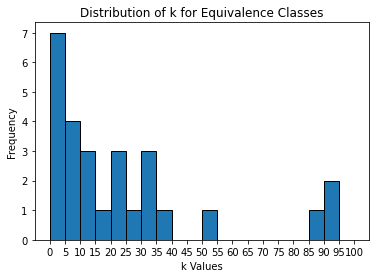

In [85]:
#Using these quasi-identifiers: qID = ['gender', 'ecg_taken_in_ed', 'ecg_taken_in_hosp', 'binned_age']
qID = ['ecg_taken_in_ed', 'ecg_taken_in_hosp', 'binned_age']
k_min, eqv_classes = k_anon(alcohol_cohort, qID)

# Plotting the histogram of k values
bins = range(0, 101, 5)

alc_figure = plt.figure()
plt.hist(eqv_classes['k'], bins=bins, edgecolor='black')
plt.title('Distribution of k for Equivalence Classes')
plt.xlabel('k Values')
plt.ylabel('Frequency')
plt.xticks(bins)


# Show the plot
plt.show()

### In the alcohol cohort, k = 1 using only the 'ecg_taken_in_ed', 'ecg_taken_in_hosp', and binned age (in decades)¶

There are $15$ equivalence classes:

,ecg_taken_in_ed,ecg_taken_in_hosp,binned_ecg,k
0,False,True,0,2271
1,False,True,1,1060
2,False,True,2,561
3,False,True,3,339
4,False,True,4,215
5,False,True,5,147
6,False,True,6,498
7,True,False,0,1503
8,True,False,1,153
9,True,False,2,26


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

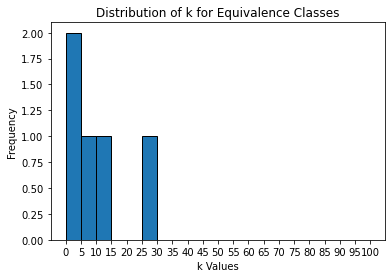

In [86]:
#Using these quasi-identifiers: qID = ['ecg_taken_in_ed', 'ecg_taken_in_hosp', 'binned_ecg']
qID = ['ecg_taken_in_ed', 'ecg_taken_in_hosp', 'binned_ecg']
k_min, eqv_classes = k_anon(alcohol_cohort, qID)

# Plotting the histogram of k values
bins = range(0, 101, 5)

alc_figure = plt.figure()
plt.hist(eqv_classes['k'], bins=bins, edgecolor='black')
plt.title('Distribution of k for Equivalence Classes')
plt.xlabel('k Values')
plt.ylabel('Frequency')
plt.xticks(bins)


# Show the plot
plt.show()

### Summary of k-anonymity for Alcohol 

Based on this result, these generalizations are not goodin terms of the utility-privacy tradeoff, with only  k=1-anonymity (worst case across equivalence classes). Many equivalence classes are small, which may lead to a high risk of identity, attribute and membership disclosure. Conversely, utility is very high.

Ideally, we would want the distribution to be less skewed to low k-values, and shifted more towards higher k values (larger equivalence classes). Looking into additional generalizations may be more beneficial for privacy.

### 2. F19.20: Other psychoactive substance dependence, uncomplicated.

In [30]:
#add column for "sensitive" diagnosis F19.20

df_sens = add_sensitive (df_sens, "F1920", "drugs")
df_sens['drugs'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    794864
1       682
Name: drugs, dtype: int64

### 3. F33.1: Major depressive disorder, recurrent, moderate.

In [31]:
#add column for "sensitive" diagnosis F33.1

df_sens = add_sensitive (df_sens, "F331", "depression")
df_sens['depression'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    795404
1       142
Name: depression, dtype: int64

### 4. F41.1: Generalized anxiety disorder.

In [32]:
#add column for "sensitive" diagnosis F41.1

df_sens = add_sensitive (df_sens, "F411", "anxiety")
df_sens['anxiety'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    794359
1      1187
Name: anxiety, dtype: int64

### 5. Z32.01: Encounter for pregnancy test, result positive.

In [33]:
#add column for "sensitive" diagnosis Z32.01

df_sens = add_sensitive (df_sens, "Z3201", "pregnancy")
df_sens['pregnancy'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    795542
1         4
Name: pregnancy, dtype: int64

### 6. Z72.51: High-risk sexual behavior.

In [34]:
#add column for "sensitive" diagnosis Z72.51

df_sens = add_sensitive (df_sens, "Z7251", "sex_high_risk")
df_sens['sex_high_risk'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    795527
1        19
Name: sex_high_risk, dtype: int64

### 7. B20: Human immunodeficiency virus [HIV] disease.

In [35]:
#add column for "sensitive" diagnosis B20

df_sens = add_sensitive (df_sens, "B20", "HIV")
df_sens['HIV'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    792263
1      3283
Name: HIV, dtype: int64

### 8. R64: Cachexia (may indicate advanced disease or malnutrition).

In [36]:
#add column for "sensitive" diagnosis R64

df_sens = add_sensitive (df_sens, "R64", "cachexia")
df_sens['cachexia'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    791573
1      3973
Name: cachexia, dtype: int64

### 9. Z65.5: Exposure to disaster, war, or other hostilities.

In [37]:
#add column for "sensitive" diagnosis Z655

df_sens = add_sensitive (df_sens, "Z655", "war")
df_sens['war'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    795544
1         2
Name: war, dtype: int64

### 10. F43.1: Post-traumatic stress disorder (PTSD).

In [38]:
#add column for "sensitive" diagnosis F431

df_sens = add_sensitive (df_sens, "F431", "PTSD")
df_sens['PTSD'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    789042
1      6504
Name: PTSD, dtype: int64

### 11. Coronary artery bypass grafting

In [39]:
#add column for "sensitive" diagnosis F10.20

df_sens = add_sensitive (df_sens, "F1020", "cabg")
df_sens['cabg'].value_counts()

/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = 0
/var/folders/kz/7xhk8t213v13875r1bz1z2g00000gn/T/ipykernel_54402/3104258237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]= df['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)


0    788640
1      6906
Name: cabg, dtype: int64

In [40]:
df_sens.tail()

,file_name,study_id,subject_id,ecg_time,ed_stay_id,ed_hadm_id,hosp_hadm_id,ed_diag_ed,ed_diag_hosp,hosp_diag_hosp,...,drugs,depression,anxiety,pregnancy,sex_high_risk,HIV,cachexia,war,PTSD,cabg
800030,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,48683947,19999840,2164-09-12 12:28:00,NaN,NaN,21033226.0,[],[],"['I69920', 'J690', 'I4901', 'E785', 'I69952', ...",...,0,0,0,0,0,0,0,0,0,0
800031,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,41842293,19999840,2164-09-17 11:31:00,NaN,NaN,21033226.0,[],[],"['I69920', 'J690', 'I4901', 'E785', 'I69952', ...",...,0,0,0,0,0,0,0,0,0,0
800032,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,41190887,19999987,2145-11-02 19:54:00,34731548.0,23865745.0,NaN,['I619'],"['N390', 'R569', 'C8589', 'E039', 'G936', 'H53...",[],...,0,0,0,0,0,0,0,0,0,0
800033,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,45828463,19999987,2145-11-03 03:00:00,NaN,NaN,23865745.0,[],[],"['N390', 'R569', 'C8589', 'E039', 'G936', 'H53...",...,0,0,0,0,0,0,0,0,0,0
800034,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,49815090,19999987,2145-11-03 08:47:00,NaN,NaN,23865745.0,[],[],"['N390', 'R569', 'C8589', 'E039', 'G936', 'H53...",...,0,0,0,0,0,0,0,0,0,0


# Run the kAnonymity_Analyze function with generalized ECG on varying sets of quasi-identifiers

## Edward: Please Run Distinct or Entropy L-diversity for various combinations of quasi-identifiers.
We should decide which ones...

## Rohan: Please Run t-closeness for various combinations of quasi-identifiers.
We should decide which ones...

## Rohan: Extension - with ECG

In [41]:
# Rohan - this could be how you merge the existing dataframe df_clean with the ECG dataframe
#df_with_ecg = pandas.merge(df_clean, <ecg_data>, on=<*** we should decide>)


# Appendix 
See this video to see tutorial on MIMIC-IV https://slideslive.com/embed/presentation/38931965

This is an extensive data repository as summarized in this link: https://physionet.org/content/mimiciv/2.2/  In summary, our data resource contains:<br> 
<br>*file_name*<br>
800035 non-null path to the waveform
<br>*study_id*<br>
800035 non-null study id within MIMIC-IV-ECG
<br>*subject_id*<br>
800035 non-null subject_id	patient id within MIMIC-IV-ECG
<br>*ecg_time*<br>
800035 non-null ecg_time	time of the waveform collection
<br>*ed_stay_id*<br>
184720 non-null ed_stay_id	ED stay identifier
<br>*ed_hadm_id*<br>
125314 non-null ed_hadm_id	hospital admission identifier sourced from the ED system
<br>*hosp_hadm_id*<br>
298258 non-null hosp_hadm_id	hospital admission identifier
<br>*ed_diag_ed*<br>
800035 non-null ed_diag_ed	CD-10-CM ED discharge diagnoses sourced from the ED system
<br>*ed_diag_hosp*<br>
800035 non-null 
<br>*hosp_diag_hosp*<br>
800035 non-null hosp_diag_hosp	ICD-10-CM hospital discharge diagnoses sourced from MIMIC-IV via 'hadm_id'

<br>*all_diag_all*<br>
800035 non-null all_diag_all	'all_diag_hosp' if available otherwise 'ed_diag_ed'
<br>*all_diag_hosp*<br>
800035 non-null all_diag_hosp	unique hospital discharge diagnoses after concatenating 'ed_diag_hosp' and 'hosp_diag_hosp'
<br>*gender*<br>
800035 non-null gender	patient's gender
<br>*age*<br>
795546 non-null age	patient age at the time of ECG recording calculated from 'anchor_age', 'anchor_year', and 'ecg_time'
<br>*anchor_year*<br>
795546 non-null anchor_age	age at 'anchor_year'
<br>*anchor_age*<br>
795546 non-null anchor_year	specified reference year
<br>*dod*<br>
218648 non-null dod	date of death (if applicable)
<br>*ecg_no_within_stay*<br>
800035 non-null ecg_no_within_stay	enumerates ECGs within a given ED/hospital stay
<br>*ecg_taken_in_ed*<br>
800035 non-null ecg_taken_in_ed	boolean variable indicating if the ECG was taken in the ED
<br>*ecg_taken_in_hosp*<br>
800035 non-null ecg_taken_in_hosp	boolean variable indicating if the ECG was taken in the hospital
<br>*ecg_taken_in_ed_or_hosp*<br>
800035 non-null ecg_taken_in_ed_or_hosp	boolean variable indicating if the ECG was taken in ED or hospital (i.e. no outpatient ECG)
<br>*fold* <br>
800035 non-null fold	random fold assignments (without patient overlap) to reproduce benchmarking results from [1]
<br>*strat_fold*<br> 
800035 non-null strat_fold	alternative stratified folds using multi-label stratification (applied to 'all_diag_all' truncated to 5 digits and uppropagation along the label tree, gender, age (binned) and outpatient status)

## For further analysis
MIMIC-IV is grouped into two modules: *hosp*, and *icu*. The aim of these modules is to highlight their provenance.

### hosp 
The hosp module contains data derived from the hospital wide EHR. 

*patients* table provides timing information. 
<br>*anchor_age:* patient age in the given anchor_year. If > 89, anchor_age is set to 91
<br>*anchor_year:*   Deidentified year occurring sometime between 2100 - 2200,
<br>*anchor_year_group:*  3Y long date range between 2008 - 2019. These dates allow researchers to infer approximate year of care.
<br>*dod:* Date of death, from hospital records (primary) and state records (matched using a custom rule based linkage algorithm based on name, date of birth, and social security number). Dates of death >1 Y after discharge are censored for deidentification. Thus, the maximum time of follow up for each patient is exactly one year after their last hospital discharge. 
<br>*labevents, d_labitems:* laboratory measurements
<br>*microbiologyevents, d_micro:* , microbiology cultures
<br>*poe, poe_detail:* provider orders,
<br>*emar, emar_detail:* medication administration,
<br>*prescriptions, pharmacy:* medication prescription,
<br>*diagnoses_icd, d_icd_diagnoses,procedures_icd, d_icd_procedures, hcpcsevents, d_hcpcs, drgcodes:* hospital billing information,
<br>*omr:* online medical record data
<br>*services:* service related information;
<br>* provider_id:* Deidentified character string which uniquely represents a single care provider. 
<br>*admit_provider_id:* provider who admits the patient to the hospital

### icu
Contains data sourced from the clinical information system at the BIDMC: MetaVision (iMDSoft). MetaVision tables were denormalized to create a star schema where the icustays and d_items tables link to a set of data tables all suffixed with "events".

<br>*inputevents:* intravenous and fluid inputs;
<br>*ingredientevents:* ingredients for the aforementioned inputs;
<br>*outputevents:* patient outputs;
<br>*procedureevents:* procedures;
<br>*datetimeevents:* information documented as a date or time;
<br>*chartevents:* other charted information;

All events tables contain a stay_id column allowing identification of the associated ICU patient in icustays, and an itemid column allowing identification of the concept documented in d_items. 

Caregiver table contains caregiver_id, a deidentified integer representing the care provider who documented data into the system. 

Events tables (chartevents, datetimeevents, ingredientevents, inputevents, outputevents, procedureevents) have a caregiver_id column which links to the caregiver table.

## Playing around - function to test list of codes

In [42]:
#Function to determine which records have/do not have ICD10 codes in an input list []
#https://www.icd10data.com/ICD10CM/Codes
def add_sensitive_flag(dataframe, sensitive_name, list_of_icd10_codes):
    if not list_of_icd10_codes:
        raise ValueError("list_of_icd10_codes must not be empty")
    
    # Ensure we work with a copy to avoid modifying the original dataframe
    data_frame_with_sensitive = dataframe.copy()

    # Check if all_diag_all column contains lists
    if not all(data_frame_with_sensitive['all_diag_all'].apply(lambda x: isinstance(x, list))):
        raise ValueError("Column 'all_diag_all' must contain lists.")

    # Add the sensitive flag
    data_frame_with_sensitive[sensitive_name] = data_frame_with_sensitive['all_diag_all'].apply(
        lambda x: 1 if any(item in list_of_icd10_codes for item in x) else 0
    )

    return data_frame_with_sensitive